<a href="https://colab.research.google.com/github/amnnxd/python_ml/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the required library
# padas == data analysis
# numpy == for maths
# matplotlib and seaborn == for data visualisation


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/ML Data/Data_Job_Salary.csv")

In [ ]:
df.head()

,ID,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,12121.0,2020.0,MI,FT,Data Scientist,70000.0,EUR,79833.0,DE,0.0,DE,L
1,12122.0,2020.0,SE,FT,Machine Learning Scientist,260000.0,USD,260000.0,JP,0.0,JP,S
2,12123.0,2020.0,SE,FT,Big Data Engineer,85000.0,GBP,109024.0,GB,50.0,GB,M
3,12124.0,2020.0,MI,FT,Product Data Analyst,20000.0,USD,20000.0,HN,0.0,HN,S
4,12125.0,NaN,SE,FT,Machine Learning Engineer,150000.0,USD,150000.0,US,50.0,US,L


In [ ]:
# Get all the columns name from data
df.columns

Index(['ID ', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df = df.rename(columns = {"ID " : "ID"})

In [ ]:
df.columns

Index(['ID', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  603 non-null    float64
 1   work_year           606 non-null    float64
 2   experience_level    607 non-null    object 
 3   employment_type     607 non-null    object 
 4   job_title           586 non-null    object 
 5   salary              606 non-null    float64
 6   salary_currency     607 non-null    object 
 7   salary_in_usd       605 non-null    float64
 8   employee_residence  606 non-null    object 
 9   remote_ratio        604 non-null    float64
 10  company_location    603 non-null    object 
 11  company_size        607 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# Get the statistical summary of data
df.describe()

,ID,work_year,salary,salary_in_usd,remote_ratio
count,603.000000,606.000000,6.060000e+02,605.000000,604.000000
mean,12425.086235,2021.407591,3.243708e+05,112280.672727,70.860927
std,175.373770,0.690341,1.545606e+06,71049.399737,40.766949
min,12121.000000,2020.000000,4.000000e+03,2859.000000,0.000000
25%,12273.500000,2021.000000,7.000000e+04,62726.000000,50.000000
50%,12426.000000,2022.000000,1.150000e+05,101570.000000,100.000000
75%,12576.500000,2022.000000,1.650000e+05,150000.000000,100.000000
max,12727.000000,2022.000000,3.040000e+07,600000.000000,100.000000


In [ ]:
# Check the row and columns
df.shape

(607, 12)

In [ ]:
# Chek for the null values
df.isnull().sum()

ID                     4
work_year              1
experience_level       0
employment_type        0
job_title             21
salary                 1
salary_currency        0
salary_in_usd          2
employee_residence     1
remote_ratio           3
company_location       4
company_size           0
dtype: int64

In [ ]:
# Handle the null values
# 1. Drop the null values
# 2. Fill the null with 0
# 3. Fill the null values with mean, median and mode


# df = df.dropna().    When null values is less the 5% of the data
# df = df.fillna(0)

df = df.fillna(df["ID"].mean())
df = df.fillna(df["job_title"].mode())
df = df.fillna(df["employment_type"].mode())
df = df.fillna(df["work_year"].mean())
df = df.fillna(df["salary"].mean())
df = df.fillna(df["salary_in_usd"].mean())
df = df.fillna(df["remote_ratio"].mean())
df = df.fillna(df["employee_residence"].mode())
df = df.fillna(df["company_location"].mode())

In [ ]:
df.isnull().sum()

ID                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# Check for the data types of columns
df.dtypes

ID                    float64
work_year             float64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object

In [ ]:
# Check for noise value
for i in df.columns:
  print(f"{i} \n {df[i].unique()} \n\n")

ID 
 [12121.         12122.         12123.         12124.
 12125.         12126.         12127.         12128.
 12129.         12130.         12131.         12132.
 12133.         12134.         12135.         12136.
 12137.         12138.         12139.         12140.
 12141.         12142.         12143.         12144.
 12145.         12146.         12147.         12148.
 12149.         12150.         12151.         12152.
 12153.         12154.         12155.         12156.
 12157.         12158.         12159.         12160.
 12161.         12162.         12163.         12164.
 12165.         12425.08623549 12167.         12168.
 12169.         12170.         12171.         12172.
 12173.         12174.         12175.         12176.
 12177.         12178.         12179.         12180.
 12181.         12182.         12183.         12184.
 12185.         12186.         12187.         12188.
 12189.         12190.         12191.         12192.
 12193.         12194.         12195.    

# Data Analysis and Data Visualisation

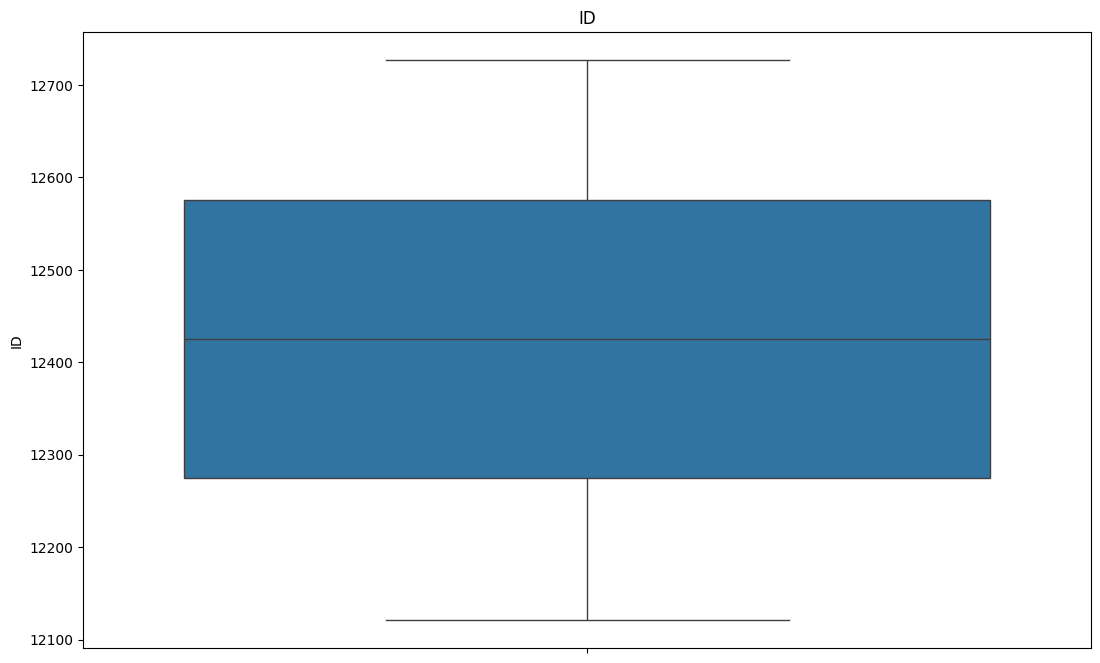

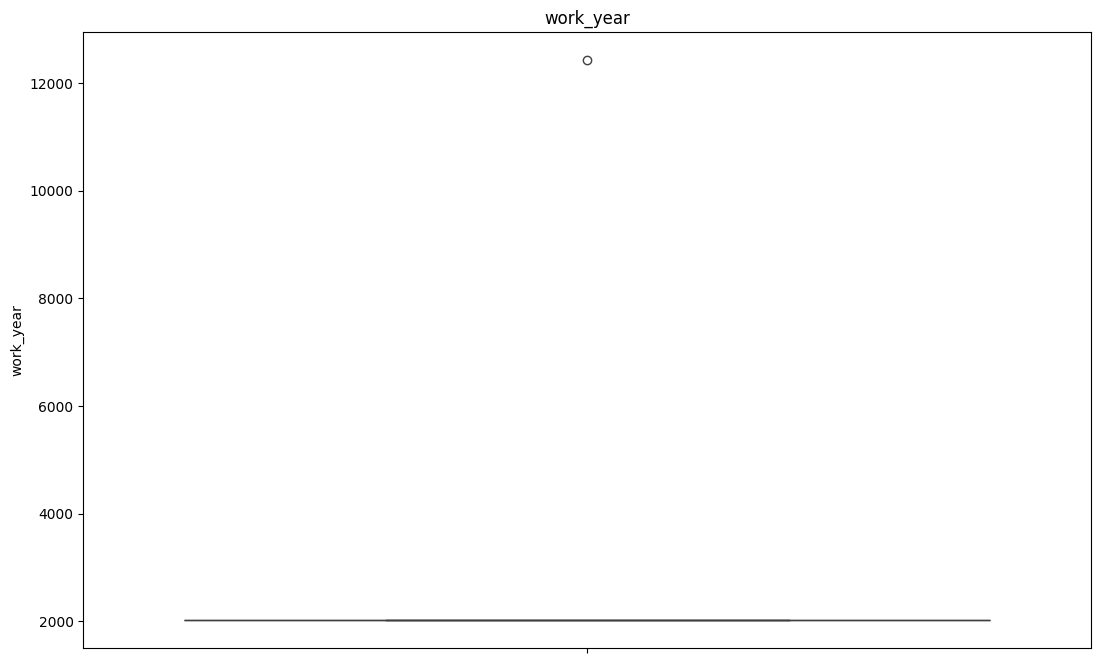

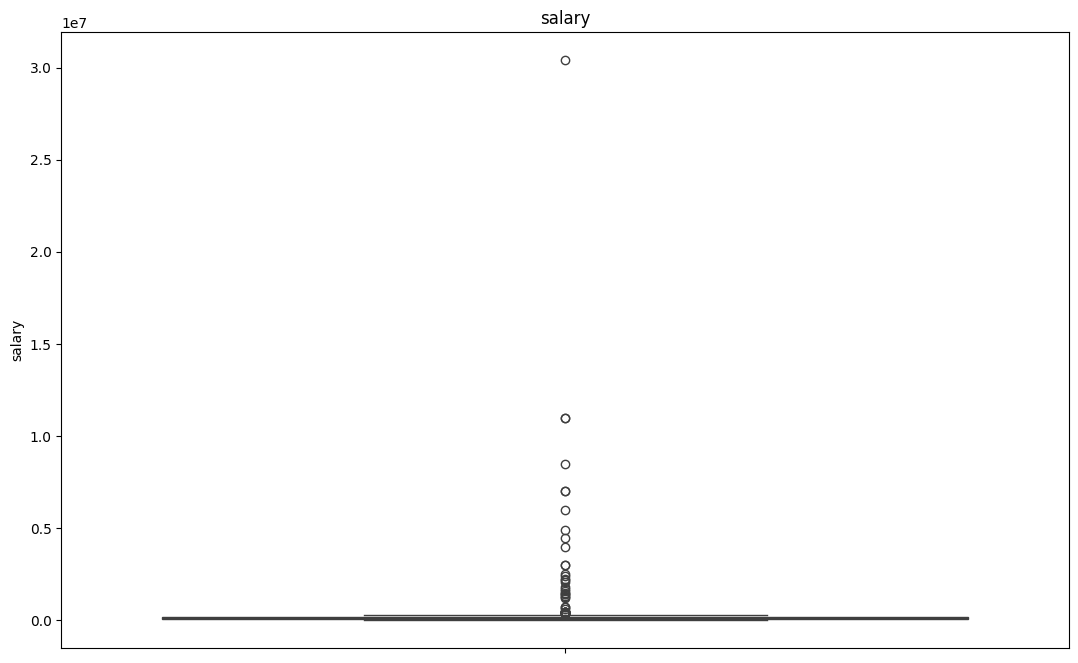

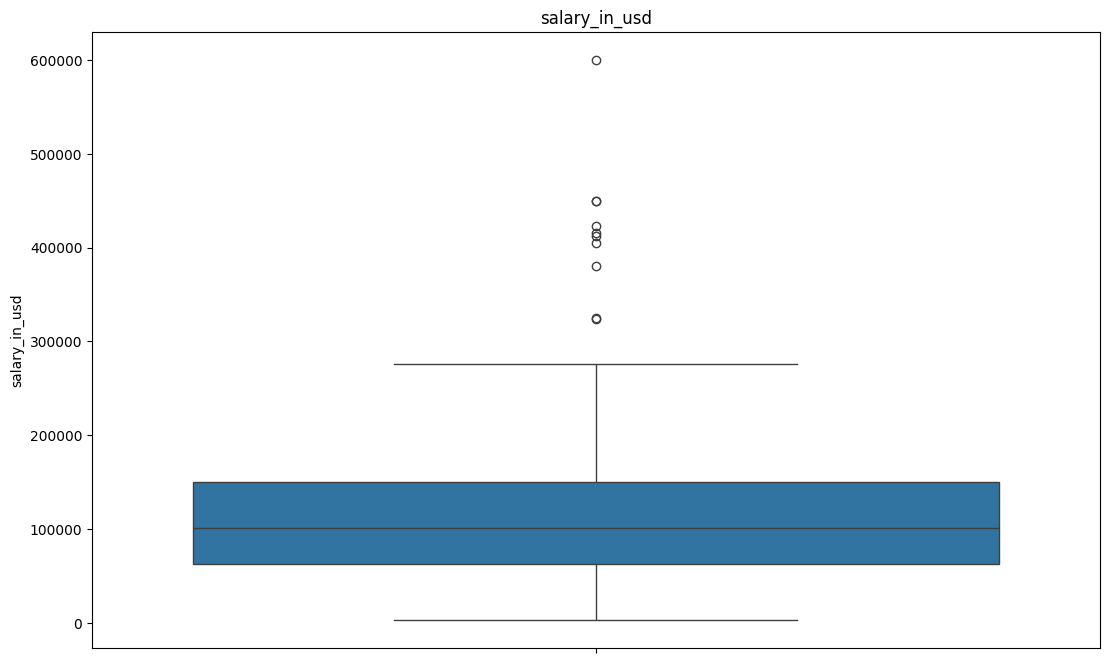

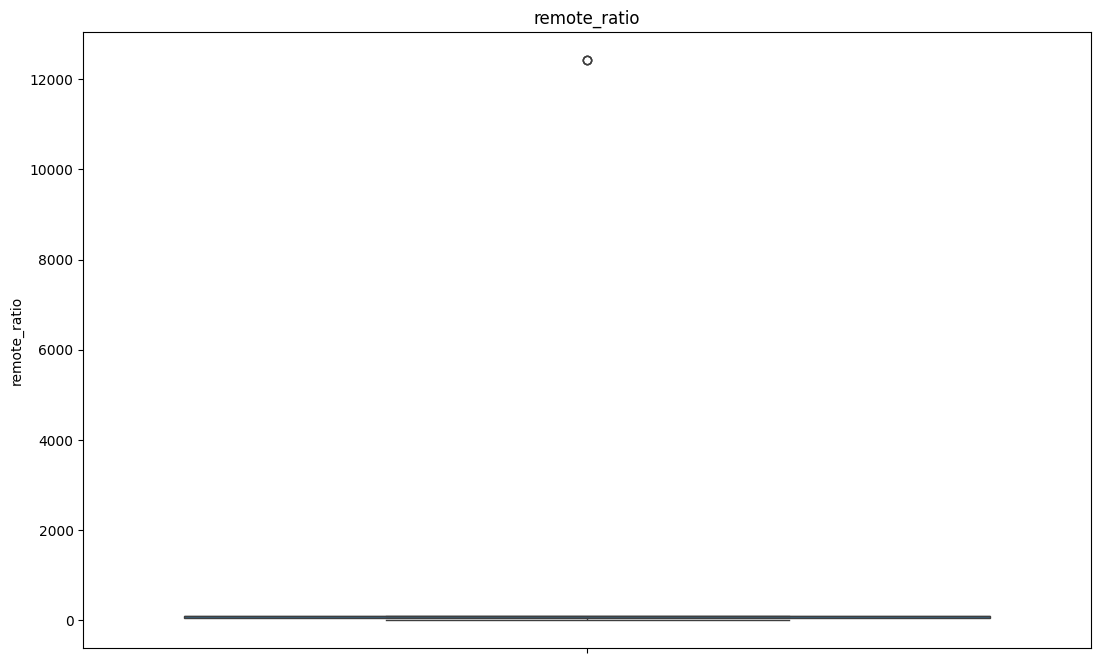

In [ ]:
# Check for the outlisers
nc = df.select_dtypes(include = "float") # select the numerical data
for i in nc:
  plt.figure(figsize = (13, 8)) # set the size of the figure
  sns.boxplot(y = df[i]) # creating a box plot to check the outliers
  plt.title(i) # Used to set the name of chart
  plt.show() # show the chart

In [ ]:
# Handle the outliers
for i in nc:
  per25 = df[i].quantile(.25)
  per75 = df[i].quantile(0.75)
  iqr = per75 - per25
  ul = per75 + (iqr * 1.5)
  ll = per25 - (iqr * 1.5)
  df = df[df[i] <= ul]
  df = df[df[i] >= ll]


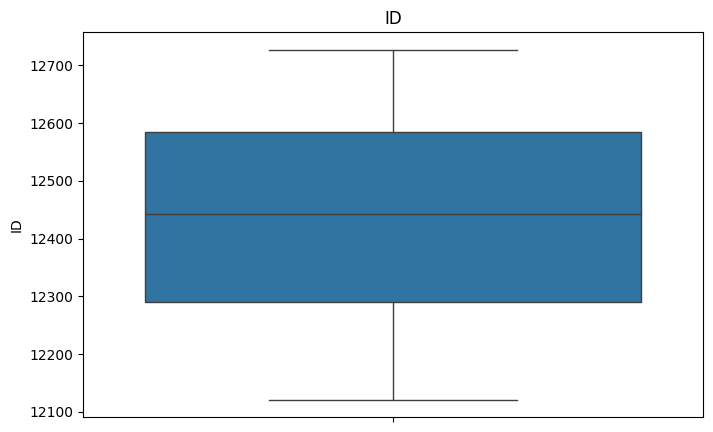

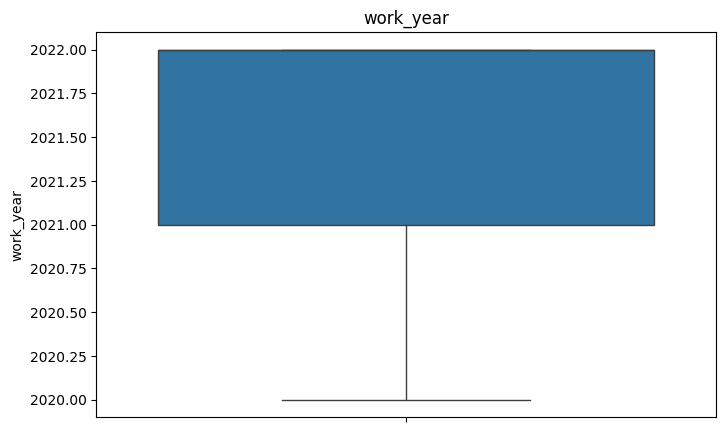

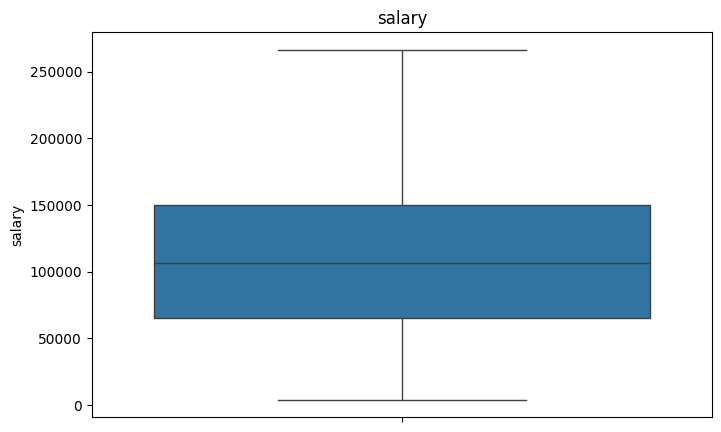

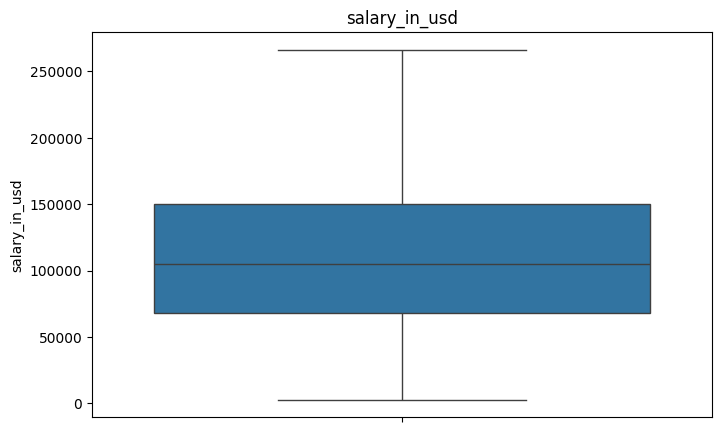

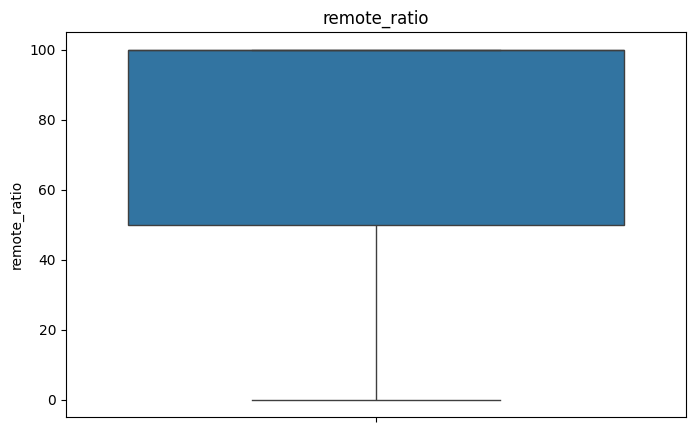

In [ ]:
# Check for the outlisers
nc = df.select_dtypes(include = "float") # select the numerical data
for i in nc:
  plt.figure(figsize = (8, 5)) # set the size of the figure
  sns.boxplot(y = df[i]) # creating a box plot to check the outliers
  plt.title(i) # Used to set the name of chart
  plt.show() # show the chart

In [ ]:
df.head()

,ID,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,12121.0,2020.0,MI,FT,Data Scientist,70000.0,EUR,79833.0,DE,0.0,DE,L
1,12122.0,2020.0,SE,FT,Machine Learning Scientist,260000.0,USD,260000.0,JP,0.0,JP,S
2,12123.0,2020.0,SE,FT,Big Data Engineer,85000.0,GBP,109024.0,GB,50.0,GB,M
3,12124.0,2020.0,MI,FT,Product Data Analyst,20000.0,USD,20000.0,HN,0.0,HN,S
5,12126.0,2020.0,EN,FT,Data Analyst,72000.0,USD,72000.0,US,100.0,US,L
